In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Attribute Information:

Each data file contains 5 columns, organized as follows.

Segment Lower Limb

Channel Ch1 Ch2 Ch3 Ch4 Ch5

Muscle RF BF VM ST FX

Column 0 1 2 3 4

In [5]:
## Data Directory

## Normal sEMG dataset in Txt
file_path = "./SEMG_DB1/N_TXT/"

## Abnormal sEMG dataset in Txt
abnormal_path = "./SEMG_DB1/A_TXT/"

In [6]:
## sEMG Plot Function from text file

class sEMGData:
    
    def __init__(self, path):
        self.path = path
        
        # file name
        f = open(path, 'r')
        basename = os.path.basename(f.name)
        
        if 'mar' in basename:
            self.output = 'mar'
        elif 'pie' in basename:
            self.output = 'pie'
        elif 'sen' in basename:
            self.output = 'sen'
        
        # invalid_raise - sk
        # numpy array
        self.array = np.genfromtxt(self.path, skip_header=7, invalid_raise=False)
        # DataFrame
        self.dataframe = pd.DataFrame(self.array, columns=['RF','BF','VM','ST','FX'])
        
    def return_array(self): 
        return self.array
    
    def return_df(self):   
        return self.dataframe
    
    def return_output(self):
        return self.output
    
    def plot_RF(self):    
        plt.plot(self.dataframe['RF'])
        plt.title('RF - rectus femoris')
        plt.show()
        
    def plot_BF(self):  
        plt.plot(self.dataframe['BF'])
        plt.title('BF - biceps femoris')
        plt.show()
        
    def plot_VM(self):
        plt.plot(self.dataframe['VM'])
        plt.title('VM - vastus internus')
        plt.show()
        
    def plot_ST(self):
        plt.plot(self.dataframe['ST'])
        plt.title('ST - semitendinosus')
        plt.show()
        
    def plot_FX(self):
        plt.plot(self.dataframe['FX'])
        plt.title('FX - knee flexion ()')
        plt.show()  
    
    def sEMG_plot(self):
        # Plot individual sEMG data
        
        plt.plot(self.dataframe['RF'])
        plt.title('RF - rectus femoris')
        plt.show()
        
        plt.plot(self.dataframe['BF'])
        plt.title('BF - biceps femoris')
        plt.show()
        
        plt.plot(self.dataframe['VM'])
        plt.title('VM - vastus internus')
        plt.show()
        
        plt.plot(self.dataframe['ST'])
        plt.title('ST - semitendinosus')
        plt.show()
        
        plt.plot(self.dataframe['FX'])
        plt.title('FX - knee flexion ()')
        plt.show()       

mar
[[ 7.00e-04 -8.30e-03  4.50e-03 -9.10e-03  5.76e+01]
 [-8.00e-04 -3.80e-03  7.00e-04 -4.60e-03  5.75e+01]
 [-8.00e-04 -6.80e-03  1.50e-03 -2.30e-03  5.73e+01]
 ...
 [-3.00e-03  1.50e-03  4.50e-03  1.50e-03  7.20e+00]
 [-4.60e-03 -1.50e-03  6.00e-03  3.00e-03  7.40e+00]
 [ 1.27e-02  9.70e-03 -5.40e-02 -3.00e-03  7.50e+00]]


<ipython-input-6-13b1858c132e>:21: ConversionWarning: Some errors were detected !
    Line #5689 (got 1 columns instead of 5)
    Line #5690 (got 1 columns instead of 5)
    Line #5691 (got 1 columns instead of 5)
    Line #5692 (got 1 columns instead of 5)
    Line #5693 (got 1 columns instead of 5)
    Line #5694 (got 1 columns instead of 5)
    Line #5695 (got 1 columns instead of 5)
    Line #5696 (got 1 columns instead of 5)
    Line #5697 (got 1 columns instead of 5)
    Line #5698 (got 1 columns instead of 5)
    Line #5699 (got 1 columns instead of 5)
    Line #5700 (got 1 columns instead of 5)
    Line #5701 (got 1 columns instead of 5)
    Line #5702 (got 1 columns instead of 5)
    Line #5703 (got 1 columns instead of 5)
    Line #5704 (got 1 columns instead of 5)
    Line #5705 (got 1 columns instead of 5)
    Line #5706 (got 1 columns instead of 5)
    Line #5707 (got 1 columns instead of 5)
  self.array = np.genfromtxt(self.path, skip_header=7, invalid_raise=False)


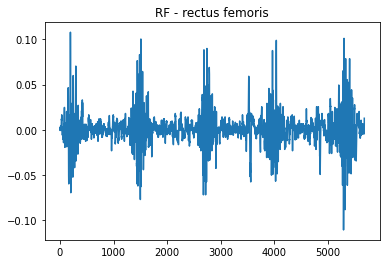

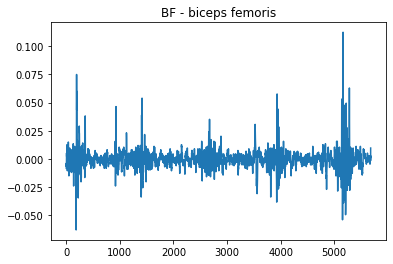

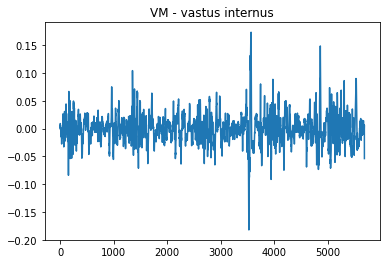

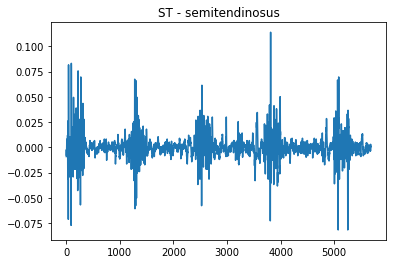

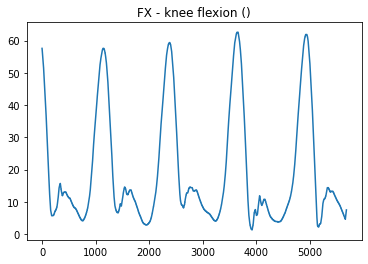

In [8]:
# instantiate sEMGData

# Marching or Walking data
nmarching_data = sEMGData(file_path + "1Nmar.txt")
print(nmarching_data.return_output())
print(nmarching_data.return_array())
nmarching_data.return_df()
nmarching_data.sEMG_plot()

In [10]:
# Preprocessing Function

def preprocess(folder):
    
    input_array = []
    classes = []
    
    # iterates through folder
    for filename in os.listdir(folder):
        if filename.endswith('.txt'):
            # instantiates each sEMG data
            sEMG = sEMGData(folder + filename)
            
            input_array.append(sEMG.return_array())
            classes.append(sEMG.return_output())
    
    # finds the max length of a sEMG sequence 
    max_len = max([len(i) for i in input_array])
    
    for i in input_array:
        if (len(i) == max_len):
            largest_array = i
    
    # list of padded sEMG numpy arrays
    padded_array = []
    
    # loop through input_array and append into new padded array
    for i in input_array:
        # zero numpy array
        zero_array = np.zeros(largest_array.shape)
        zero_array[:i.shape[0],:i.shape[1]] = i

        padded_array.append(zero_array)
    
    # convert to 3d numpy array
    padded_array = np.dstack(padded_array)
    
    # transpose array
    padded_array = padded_array.transpose(2,0,1)
    
    return padded_array, classes

In [11]:
# Returns two arrays of the folders sEMG data
# the input and the class

input_array, classes = preprocess(file_path)

<ipython-input-6-13b1858c132e>:21: ConversionWarning: Some errors were detected !
    Line #7308 (got 1 columns instead of 5)
    Line #7309 (got 1 columns instead of 5)
    Line #7310 (got 1 columns instead of 5)
    Line #7311 (got 1 columns instead of 5)
    Line #7312 (got 1 columns instead of 5)
    Line #7313 (got 1 columns instead of 5)
    Line #7314 (got 1 columns instead of 5)
    Line #7315 (got 1 columns instead of 5)
    Line #7316 (got 1 columns instead of 5)
    Line #7317 (got 1 columns instead of 5)
    Line #7318 (got 1 columns instead of 5)
    Line #7319 (got 1 columns instead of 5)
    Line #7320 (got 1 columns instead of 5)
    Line #7321 (got 1 columns instead of 5)
    Line #7322 (got 1 columns instead of 5)
    Line #7323 (got 1 columns instead of 5)
    Line #7324 (got 1 columns instead of 5)
    Line #7325 (got 1 columns instead of 5)
    Line #7326 (got 1 columns instead of 5)
    Line #7327 (got 1 columns instead of 5)
  self.array = np.genfromtxt(self.path

In [25]:
print(input_array)

[[[-8.00e-04 -4.60e-03  3.00e-03 -9.80e-03 -5.91e+01]
  [ 7.00e-04 -5.30e-03  1.50e-03 -6.00e-03 -5.92e+01]
  [ 0.00e+00 -4.60e-03  3.00e-03 -1.50e-03 -5.93e+01]
  ...
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]]

 [[-3.00e-03 -3.00e-03 -1.95e-02  4.50e-03 -5.26e+01]
  [-8.00e-04 -1.50e-03 -2.03e-02  5.20e-03 -5.26e+01]
  [-1.50e-03 -1.50e-03 -1.65e-02  3.70e-03 -5.26e+01]
  ...
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]]

 [[-3.00e-03  7.00e-04 -8.00e-04  6.70e-03 -6.00e-01]
  [-1.50e-03  3.30e-02  7.00e-04  1.27e-02 -6.00e-01]
  [-8.00e-04  2.92e-02  0.00e+00  5.20e-03 -6.00e-01]
  ...
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]]

 ...

In [13]:
print(input_array.shape)

(33, 36900, 5)


In [14]:
print(input_array[0].shape)

(36900, 5)


In [15]:
# print individual sEMG data
print(input_array[0])

[[-8.00e-04 -4.60e-03  3.00e-03 -9.80e-03 -5.91e+01]
 [ 7.00e-04 -5.30e-03  1.50e-03 -6.00e-03 -5.92e+01]
 [ 0.00e+00 -4.60e-03  3.00e-03 -1.50e-03 -5.93e+01]
 ...
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]]
